## Импорт необходимых для анализа библиотек

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Считываю данные, обычно в csv данные разделеные запятой, в нашем случае же ; , поэтому нужно указать sep = ";"

In [2]:
data = pd.read_csv('data_test.csv' , sep= ';')

In [3]:
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0
...,...,...,...,...,...
805816,4243322997,28.02.2022,2.0,0.0,0.0
805817,67461867,28.02.2022,3.0,0.0,0.0
805818,302417315,28.02.2022,NaN,NaN,NaN
805819,1780553365,28.02.2022,4.0,0.0,2.0


## Предварительный анализ

In [4]:
data.describe()

,CLIENT_ID,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
count,8.058210e+05,711169.000000,711169.000000,711169.000000
mean,2.144370e+09,11.586834,3.273264,4.508691
std,1.240761e+09,15.670639,5.588272,7.469828
min,8.294000e+03,0.000000,0.000000,0.000000
25%,1.068350e+09,3.000000,0.000000,1.000000
50%,2.143822e+09,7.000000,2.000000,2.000000
75%,3.220979e+09,15.000000,4.000000,5.000000
max,4.294935e+09,1247.000000,555.000000,563.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CLIENT_ID           805821 non-null  int64  
 1   VALUE_DAY           805821 non-null  object 
 2   DIGITAL_30_CNT      711169 non-null  float64
 3   TRAN_ACTIVE_30_CNT  711169 non-null  float64
 4   OPER_ACTIVE_30_CNT  711169 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 30.7+ MB


In [6]:
data.isna().sum()

CLIENT_ID                 0
VALUE_DAY                 0
DIGITAL_30_CNT        94652
TRAN_ACTIVE_30_CNT    94652
OPER_ACTIVE_30_CNT    94652
dtype: int64

In [7]:
data.groupby('CLIENT_ID').count()

,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
CLIENT_ID,,,,
8294,6,6,6,6
10609,6,6,6,6
15465,6,6,6,6
69014,6,6,6,6
100397,6,6,6,6
...,...,...,...,...
4294839524,6,6,6,6
4294859384,6,6,6,6
4294873964,6,0,0,0


## Достаточно большой датасет: 805821 записей, невооруженным глазом заметны выбросы: достаточно посмотреть на значения 3 и 4 квартиля, также возникает проблема с NaN, поскольку отсутствие записи по пользователю за определенный месяц означает отсутствие его активности в приложении, то заменим NaN на 0(во избежании каких либо ошибок). Поскольку работаем с данными по временному ряду, то преобразую VALUE_DAY в datetime

In [8]:
data['VALUE_DAY'] = pd.to_datetime(data['VALUE_DAY'], format='%d.%m.%Y')

## Активные клиенты (наличие строки для клиента на отчетную дату)

In [9]:
data['IS_ACTIVE'] = ~data['DIGITAL_30_CNT'].isna()

In [10]:
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,IS_ACTIVE
0,3596869440,2021-09-30,18.0,8.0,9.0,True
1,181778433,2021-09-30,7.0,3.0,3.0,True
2,4271531990,2021-09-30,2.0,0.0,0.0,True
3,3949165697,2021-09-30,15.0,4.0,5.0,True
4,1926920317,2021-09-30,3.0,0.0,0.0,True
...,...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0,True
805817,67461867,2022-02-28,3.0,0.0,0.0,True
805818,302417315,2022-02-28,NaN,NaN,NaN,False
805819,1780553365,2022-02-28,4.0,0.0,2.0,True


In [11]:
data.fillna(0, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CLIENT_ID           805821 non-null  int64         
 1   VALUE_DAY           805821 non-null  datetime64[ns]
 2   DIGITAL_30_CNT      805821 non-null  float64       
 3   TRAN_ACTIVE_30_CNT  805821 non-null  float64       
 4   OPER_ACTIVE_30_CNT  805821 non-null  float64       
 5   IS_ACTIVE           805821 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 31.5 MB


In [13]:
data.isna().sum()

CLIENT_ID             0
VALUE_DAY             0
DIGITAL_30_CNT        0
TRAN_ACTIVE_30_CNT    0
OPER_ACTIVE_30_CNT    0
IS_ACTIVE             0
dtype: int64

## Создаем когорты

In [14]:
data['COHORT'] = data.groupby('CLIENT_ID')['VALUE_DAY'].transform('min').dt.strftime('%B %Y')

|Спецификатор|Описание|
|:------|:---------------------------------------|
| %B   | Полное название месяца                |
| %Y   | Год с четырьмя цифрами                |

In [15]:
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,IS_ACTIVE,COHORT
0,3596869440,2021-09-30,18.0,8.0,9.0,True,September 2021
1,181778433,2021-09-30,7.0,3.0,3.0,True,September 2021
2,4271531990,2021-09-30,2.0,0.0,0.0,True,September 2021
3,3949165697,2021-09-30,15.0,4.0,5.0,True,September 2021
4,1926920317,2021-09-30,3.0,0.0,0.0,True,September 2021
...,...,...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0,True,September 2021
805817,67461867,2022-02-28,3.0,0.0,0.0,True,September 2021
805818,302417315,2022-02-28,0.0,0.0,0.0,False,September 2021
805819,1780553365,2022-02-28,4.0,0.0,2.0,True,January 2022


## Диджитал активные клиенты (активные в мобильном приложении: наличие хотя бы одного входа)

In [16]:
data['IS_DIGITAL_ACTIVE'] = data['DIGITAL_30_CNT'] > 0

## Операционно активные клиенты

In [17]:
data['IS_OPER_ACTIVE'] = data['OPER_ACTIVE_30_CNT'] > 0

## Транзакционно активные клиенты

In [18]:
data['IS_TRAN_ACTIVE'] = data['TRAN_ACTIVE_30_CNT'] > 0

In [19]:
data

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT,IS_ACTIVE,COHORT,IS_DIGITAL_ACTIVE,IS_OPER_ACTIVE,IS_TRAN_ACTIVE
0,3596869440,2021-09-30,18.0,8.0,9.0,True,September 2021,True,True,True
1,181778433,2021-09-30,7.0,3.0,3.0,True,September 2021,True,True,True
2,4271531990,2021-09-30,2.0,0.0,0.0,True,September 2021,True,False,False
3,3949165697,2021-09-30,15.0,4.0,5.0,True,September 2021,True,True,True
4,1926920317,2021-09-30,3.0,0.0,0.0,True,September 2021,True,False,False
...,...,...,...,...,...,...,...,...,...,...
805816,4243322997,2022-02-28,2.0,0.0,0.0,True,September 2021,True,False,False
805817,67461867,2022-02-28,3.0,0.0,0.0,True,September 2021,True,False,False
805818,302417315,2022-02-28,0.0,0.0,0.0,False,September 2021,False,False,False
805819,1780553365,2022-02-28,4.0,0.0,2.0,True,January 2022,True,True,False


In [20]:
data['IS_ACTIVE'].value_counts()

True     711169
False     94652
Name: IS_ACTIVE, dtype: int64

In [21]:
data['IS_DIGITAL_ACTIVE'].value_counts()

True     708679
False     97142
Name: IS_DIGITAL_ACTIVE, dtype: int64

In [22]:
data['IS_OPER_ACTIVE'].value_counts()

True     558946
False    246875
Name: IS_OPER_ACTIVE, dtype: int64

In [23]:
data['IS_TRAN_ACTIVE'].value_counts()

True     508751
False    297070
Name: IS_TRAN_ACTIVE, dtype: int64

## Результатом работы должны быть 4 визуализации и выводы. Напишу функцию (изначально писал последовательно но по итогу для компактности и простоты написал её), которая создаст 4 сводные таблицы (для каждого из статусов)

In [24]:
def calculate_retention(data, activity_column):
    # Группировка данных по 'COHORT', выбранному показателю и месяцу 'VALUE_DAY'
    grouped_data = data.groupby(['COHORT', activity_column, pd.Grouper(key='VALUE_DAY', freq='M')])\
                     .agg(n_customers=('CLIENT_ID', 'nunique')).reset_index()

    # Находим минимальную дату для каждой когорты
    cohort_group = grouped_data.groupby('COHORT')['VALUE_DAY'].min().reset_index()
    cohort_group.rename({'VALUE_DAY': 'MIN_VALUE_DAY'}, axis=1, inplace=True)

    # Добавляем минимальную дату к исходным данным
    grouped_data = grouped_data.merge(cohort_group, on='COHORT')

    # Вычисляем количество месяцев от первой активности в когорте
    grouped_data['MONTH'] = ((grouped_data['VALUE_DAY'].dt.year - grouped_data['MIN_VALUE_DAY'].dt.year) * 12 +
                             (grouped_data['VALUE_DAY'].dt.month - grouped_data['MIN_VALUE_DAY'].dt.month)) + 1

    # Фильтруем данные только для активных клиентов в соответствии с выбранным статусом
    active_data = grouped_data[grouped_data[activity_column]]

    # Создаем сводную таблицу
    pivot_table = active_data.pivot_table(index='COHORT', columns='MONTH', values='n_customers')

    # Приводим данные к процентным значениям
    cohort_sizes = pivot_table.iloc[:, 0]
    retention_table = pivot_table.divide(cohort_sizes, axis=0)

    # Преобразуем индекс в datetime и сортируем
    retention_table.index = pd.to_datetime(retention_table.index)
    retention_table.sort_index(ascending=True, inplace=True)

    # Форматируем индекс для отображения
    retention_table.index = retention_table.index.strftime('%B %Y')

    return retention_table

In [25]:
retention_active = calculate_retention(data, 'IS_ACTIVE') # сводная таблица для удержания активных клиентов
retention_digital = calculate_retention(data , 'IS_DIGITAL_ACTIVE') # сводная таблица для удержания диджитал активных клиентов
retention_oper = calculate_retention(data, 'IS_OPER_ACTIVE') # сводная таблица для удержания операционно активных клиентов
retention_tran = calculate_retention(data, 'IS_TRAN_ACTIVE') # сводная таблица для удержания транзакционно активных клиентов

In [26]:
retention_active

MONTH,1,2,3,4,5,6
COHORT,,,,,,
September 2021,1.0,0.962054,0.938701,0.918845,0.828976,0.825674
October 2021,1.0,0.860978,0.822808,0.659116,0.647479,NaN
November 2021,1.0,0.867805,0.751392,0.689566,NaN,NaN
December 2021,1.0,0.793663,0.777427,NaN,NaN,NaN
January 2022,1.0,0.955254,NaN,NaN,NaN,NaN
February 2022,1.0,NaN,NaN,NaN,NaN,NaN


In [27]:
retention_digital

MONTH,1,2,3,4,5,6
COHORT,,,,,,
September 2021,1.0,0.961979,0.938885,0.919024,0.828826,0.825601
October 2021,1.0,0.862139,0.822951,0.659953,0.648712,NaN
November 2021,1.0,0.869281,0.752194,0.690756,NaN,NaN
December 2021,1.0,0.794323,0.777989,NaN,NaN,NaN
January 2022,1.0,0.955283,NaN,NaN,NaN,NaN
February 2022,1.0,NaN,NaN,NaN,NaN,NaN


In [28]:
retention_oper

MONTH,1,2,3,4,5,6
COHORT,,,,,,
September 2021,1.0,0.973447,0.975941,0.996078,0.874622,0.888098
October 2021,1.0,0.800282,0.806328,0.651753,0.653769,NaN
November 2021,1.0,0.806346,0.689687,0.671722,NaN,NaN
December 2021,1.0,0.709918,0.709727,NaN,NaN,NaN
January 2022,1.0,0.949003,NaN,NaN,NaN,NaN
February 2022,1.0,NaN,NaN,NaN,NaN,NaN


In [29]:
retention_tran

MONTH,1,2,3,4,5,6
COHORT,,,,,,
September 2021,1.0,0.985237,0.978691,0.976956,0.869073,0.893036
October 2021,1.0,0.826740,0.818875,0.696616,0.698046,NaN
November 2021,1.0,0.838868,0.741554,0.731735,NaN,NaN
December 2021,1.0,0.740416,0.764553,NaN,NaN,NaN
January 2022,1.0,0.974456,NaN,NaN,NaN,NaN
February 2022,1.0,NaN,NaN,NaN,NaN,NaN


In [30]:
def plot_retention(retention_data, title):
    plt.figure(figsize=(8, 4))
    sns.heatmap(retention_data, annot=True, fmt='.0%', cmap='Blues')
    plt.title(title)
    plt.ylabel('Когорта')
    plt.xlabel('Месяц после первой активности')
    plt.show()

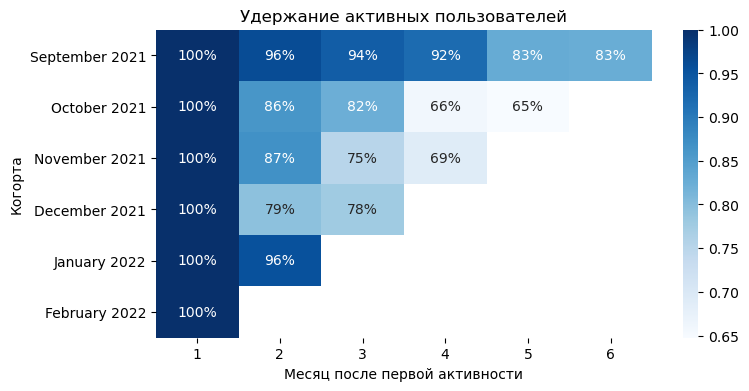

In [31]:
plot_retention(retention_active, 'Удержание активных пользователей')

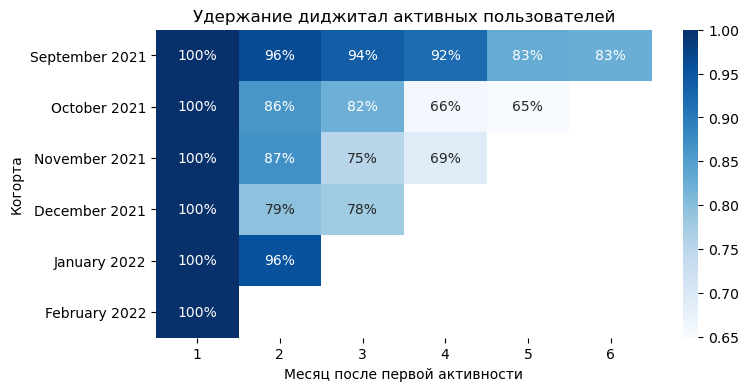

In [32]:
plot_retention(retention_digital, 'Удержание диджитал активных пользователей')

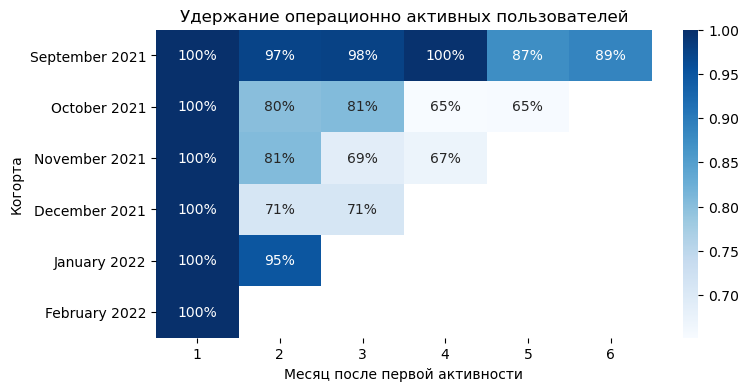

In [33]:
plot_retention(retention_oper, 'Удержание операционно активных пользователей')

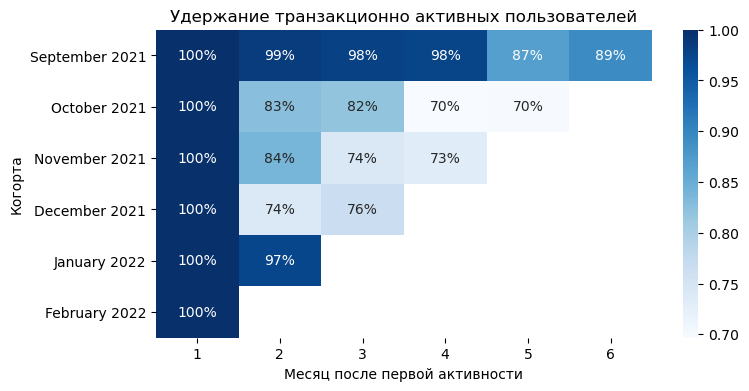

In [34]:
plot_retention(retention_tran, 'Удержание транзакционно активных пользователей')

## Выводы: удержание клиентов в каждом статусе практически всегда имеет невозрастающую тенденцию, наибольшее падение удержание происходит в декабрьской когорте, что указывает на необходимость дополнительного анализа внутри неё, среди всех статусов наибольшее падения удержания происходит у транзакционно и операционно активных пользователей, что может свидетельствовать о неудовлетворенности сервисами - также требуется дополнительный анализ. Для повышения удержания важно разработать целевые стратегии для каждого типа активности, учитывая их уникальные тренды и поведение пользователей.